In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [32]:
USpolice21 = pd.read_excel("New/USDATA/KnownUSincedents2021/Table_8_Offenses_Known_to_Law_Enforcement_by_State_by_City_2021.xlsx")

## Offenses Known to Law Enforcement
#### by State by City, 2021

In [33]:
USpolice21.drop([0,1,2,5878],inplace=True)

In [39]:
USpolice21.rename(columns={"Table 8":"State","Unnamed: 1":"City","Unnamed: 2":"Population","Unnamed: 3":"ViolentCrime","Unnamed: 4":"MurderNonnegligentManslaughter",
"Unnamed: 5":"Rape","Unnamed: 6":"Robbery","Unnamed: 7":"AggravatedAssault","Unnamed: 8":"PropertyCrime","Unnamed: 9":"Burglary","Unnamed: 10":"Larcenytheft","Unnamed: 11":"Motor\nvehicle\ntheft","Unnamed: 12":"Arson"},inplace=True)


In [ ]:
USpolice21

,State,City,Population,ViolentCrime,MurderNonnegligentManslaughter,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larcenytheft,Motor\nvehicle\ntheft,Arson
3,ALABAMA,Abbeville,2539,4,1,0,0,3,53,11,37,5,0
4,ALABAMA,Alabaster,33963,25,1,4,0,20,282,13,253,16,1
5,ALABAMA,Alexander City,14066,40,0,0,7,33,283,178,87,18,1
6,ALABAMA,Altoona,913,4,0,0,0,4,7,1,6,0,0
7,ALABAMA,Andalusia,8643,44,1,6,1,36,254,45,198,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,WYOMING,Rock Springs,22937,49,1,17,2,29,286,44,217,25,3
5874,WYOMING,Sheridan,18157,15,0,0,0,15,239,19,202,18,2
5875,WYOMING,Thermopolis,2747,2,0,0,0,2,25,2,23,0,0
5876,WYOMING,Torrington,6564,16,1,4,0,11,63,15,40,8,1


In [54]:
USpolice21.to_csv('USpolice.csv')

In [57]:
USpolice21.ViolentCrime.describe()

count     5873
unique     509
top          0
freq       536
Name: ViolentCrime, dtype: int64

In [62]:
USpolice21.ViolentCrime.mean()

100.29865486122935

In [56]:
USpolice21.State.describe()

count      5875
unique       51
top       TEXAS
freq        586
Name: State, dtype: object

In [52]:
USpolice21.Population.describe()

count     5873
unique    5063
top       1665
freq         6
Name: Population, dtype: int64

In [53]:
USpolice21.PropertyCrime.describe()

count     5873
unique    1233
top          0
freq       123
Name: PropertyCrime, dtype: int64

In [60]:
USpolice21.PropertyCrime.mean()

511.11016516260855

##   Hypothesis:There is no corralation between property crime and bodily crime
## Null: There is higher property damage than there is violent crimes against a person

Analysis:t test

<AxesSubplot: >

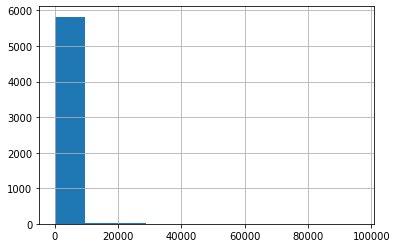

In [59]:
USpolice21['PropertyCrime'].hist()

<AxesSubplot: >

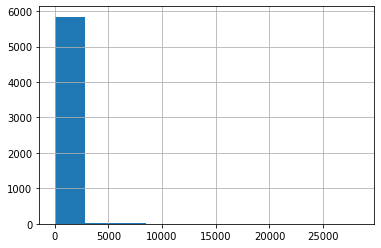

In [58]:
USpolice21['ViolentCrime'].hist()

<AxesSubplot: >

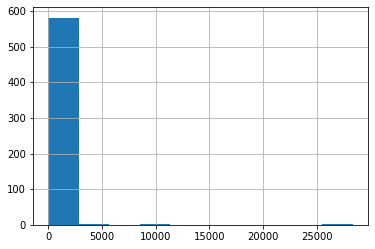

In [66]:
USpolice21.ViolentCrime[USpolice21.State == 'TEXAS'].hist()

## Hypothesis:There is no corralation between the number of assaults and murder
## Null: As the number of assaults increase there is a increase in murders

Analysis:

## Hypothesis:There is no corralation between the number of crimes and population
## Null: As the population increases there is a increase in crimes

Analysis:

In [15]:
USpoliceage = pd.read_excel("New/USDATA/ucrAgeGender.xlsx")

In [18]:
USpoliceage.drop([0,1,4,19,30,33,34,35,36,37,38,39,40,41,42,43,44],inplace=True)

In [19]:
USpoliceage.rename(columns={"Estimated number of arrests by offense and age group, 2020":"Offenses","Unnamed: 1":"All ages","Unnamed: 2":"0 to 17","Unnamed: 3":"18 & older","Unnamed: 4":"10 to 17","Unnamed: 5":"0 to 14","Unnamed: 6":"15 to 17","Unnamed: 7":"18 to 20","Unnamed: 8":"21 to 24","Unnamed: 9":"25 & older"},inplace=True)

In [20]:
USpoliceage

,Offenses,All ages,0 to 17,18 & older,10 to 17,0 to 14,15 to 17,18 to 20,21 to 24,25 & older
2,All offenses,7632470,424300,7208180,422640,121930,302370,592260,894730,5721190
3,Murder and nonnegligent manslaughter,12440,930,11510,930,90,840,1820,2140,7550
5,Robbery,67900,12000,55900,12000,2490,9510,10610,9420,35880
6,Aggravated assault,381190,19140,362050,19050,5560,13580,26590,46300,289160
7,Burglary,149350,15130,134230,15040,4830,10300,12300,16050,105870
8,Larceny-theft,629020,46700,582320,46600,12530,34180,50640,65240,466450
9,Motor vehicle theft,83220,11660,71560,11650,3340,8320,7270,9570,54720
10,Arson,9780,1200,8580,1160,660,540,450,780,7350
11,Simple assault,906980,70940,836040,70610,27250,43690,59560,103620,672860
12,Forgery and counterfeiting,32500,470,32030,470,70,400,3230,3510,25300


['white', 'white', 'white', 'white']
['red', 'green', 'blue', 'yellow']
['red', 'green', 'blue', 'purple']
